In [ ]:
import h5py
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input_dir = "/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_1024Hz_1s_fullparam_massratio/tset_tot-10000000_split-1000/"

In [9]:
input_dir = "/home/joseph.bayley/data/CBC/O4MDC/validation_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-1000_split-1000/"

In [3]:
filename = "data_61000-10000000.h5py"

In [12]:
with open(os.path.join(input_dir,filename),"r") as f:
    print(f)

<_io.TextIOWrapper name='/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-10000000_split-1000/data_61000-10000000.h5py' mode='r' encoding='UTF-8'>


In [ ]:
data_453000-10000000.h5py

In [5]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [ ]:
for fname in os.listdir(input_dir):

    with h5py.File(os.path.join(input_dir,fname), 'r') as f:
        pass

In [13]:
os.listdir(input_dir)

[]

In [45]:
xdat = np.linspace(0,1,100)

In [98]:
s_arr = tf.transpose(tf.split(tf.transpose(tf.repeat(tf.sin(10*xdat[:,np.newaxis]), 6, axis = 1)), 2,axis = 0), (1,2,0))

In [99]:
s_arr.shape

TensorShape([3, 100, 2])

In [102]:
spl = tf.split(s_arr, 5, axis=1)
#spl_arr = tf.reshape(spl, (-1, 5, 20))
con_arr = tf.transpose(tf.squeeze(tf.concat(tf.expand_dims(spl, -1), axis = 2)), perm = (1,0,2, 3))
c_arr = tf.transpose(spl, (1,0,2, 3))

In [103]:
c_arr

<tf.Tensor: shape=(3, 5, 20, 2), dtype=float64, numpy=
array([[[[ 0.        ,  0.        ],
         [ 0.10083842,  0.10083842],
         [ 0.20064886,  0.20064886],
         [ 0.2984138 ,  0.2984138 ],
         [ 0.39313661,  0.39313661],
         [ 0.48385164,  0.48385164],
         [ 0.56963411,  0.56963411],
         [ 0.64960951,  0.64960951],
         [ 0.72296256,  0.72296256],
         [ 0.78894546,  0.78894546],
         [ 0.84688556,  0.84688556],
         [ 0.8961922 ,  0.8961922 ],
         [ 0.93636273,  0.93636273],
         [ 0.96698762,  0.96698762],
         [ 0.98775469,  0.98775469],
         [ 0.99845223,  0.99845223],
         [ 0.99897117,  0.99897117],
         [ 0.98930624,  0.98930624],
         [ 0.96955595,  0.96955595],
         [ 0.93992165,  0.93992165]],

        [[ 0.90070545,  0.90070545],
         [ 0.85230712,  0.85230712],
         [ 0.79522006,  0.79522006],
         [ 0.73002623,  0.73002623],
         [ 0.65739025,  0.65739025],
         [ 0.57805

In [67]:
spl_arr.shape

TensorShape([3, 20, 5])

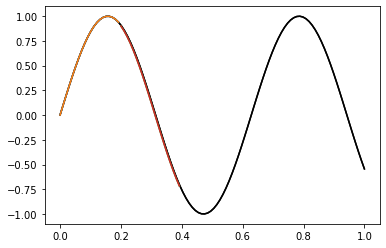

In [107]:
fig, ax = plt.subplots()
ax.plot(xdat,s_arr[0], "k")
#ax.plot(xdat[:20], spl_arr[0][0])
for i in range(2):
    ax.plot(xdat[:20] + i/5, c_arr[0][i])

In [110]:
with h5py.File("/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_2_result.hdf5","r") as f:
    print(f.keys())

<KeysViewHDF5 ['__module__', '__name__', 'constraint_parameter_keys', 'fixed_parameter_keys', 'information_gain', 'injection_parameters', 'label', 'log_bayes_factor', 'log_evidence', 'log_evidence_err', 'log_likelihood_evaluations', 'log_noise_evidence', 'log_prior_evaluations', 'meta_data', 'nested_samples', 'outdir', 'parameter_labels', 'parameter_labels_with_unit', 'posterior', 'priors', 'sampler', 'sampler_kwargs', 'samples', 'sampling_time', 'search_parameter_keys', 'use_ratio', 'version']>


In [109]:
data

<Closed HDF5 file>